In [2]:
from scripts.db_connection import get_connection
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
'''
atm_pressure_station_level
date_time_utc
dew_point_temperature
dry_bulb_temperature
global_radiation
hourly_relative_humidity
hourly_wind_direction
hourly_wind_speed
max_atm_pressure_last_hour
max_dew_point_temperature_last_hour
max_relative_humidity_last_hour
max_temperature_last_hour
max_wind_gust
min_atm_pressure_last_hour
min_dew_point_temperature_last_hour
min_relative_humidity_last_hour
min_temperature_last_hour
total_precipitation
station_id'''

'''
id
altitude
code
founding_date
latitude
longitude
name
region
uf'''

'''
tb_climate_track 
tb_station
'''

'''
9916c323-882c-4b77-b0e5-246a2d4e108f	CAMPINA GRANDE
e864406b-2b18-4966-bd8d-16624766213c	SAO GONCALO
fd3d2d43-f59c-4dc4-bd6e-516e00a2bad9	CAMARATUBA
39ce9b23-7108-460a-a3da-7cc44f6d42e6	JOAO PESSOA
261e2ab6-e2ed-4d1c-9695-617344434fe4	MONTEIRO
32005a83-d70d-4927-b7c3-3b4ee905e01a	ITAPORANGA
1e3f1492-7521-4c6a-9d64-a232560816d8	AREIA
df33429c-9b68-40c7-b6ea-26e6a626a21c	PATOS
888edcb8-54b8-4c35-ae6e-67a5a6bed35d	CABACEIRAS
'''

In [3]:
conn = get_connection()

TEMPERATURA moda e media areia

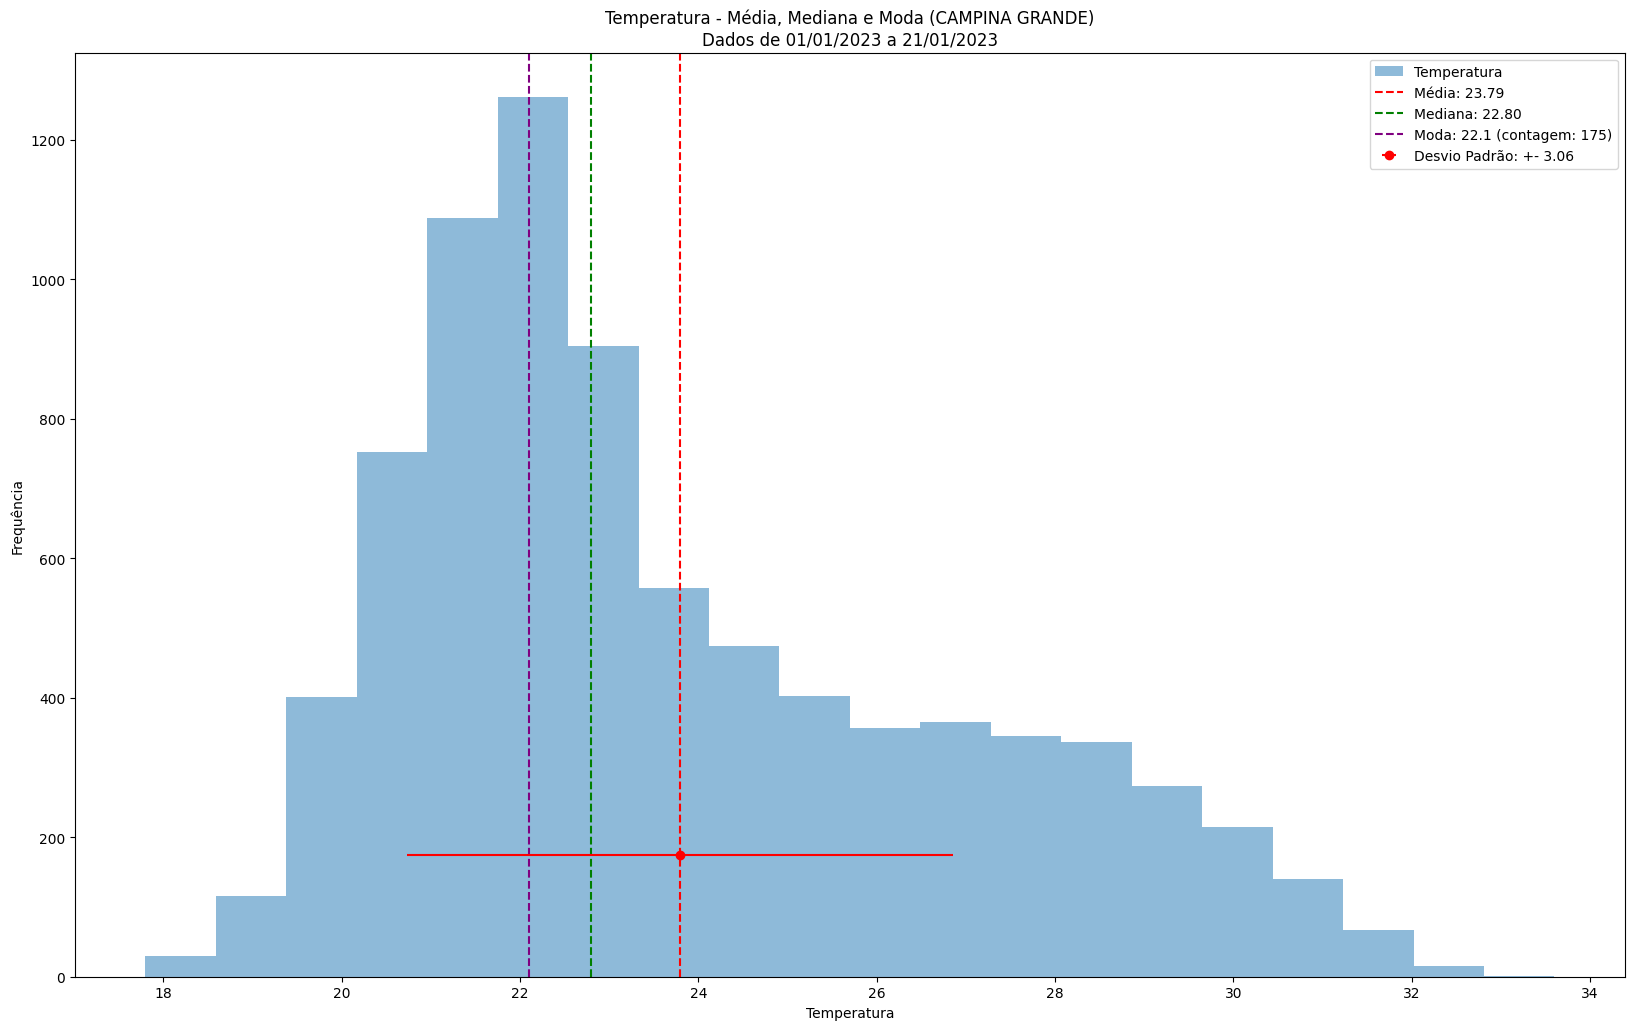

Estatísticas para CAMPINA GRANDE:
Média: 23.79
Mediana: 22.80
Moda: 22.1 (contagem: 175)
Desvio Padrão: 3.06
Primeiros 10 registros:


,dry_bulb_temperature
0,23.0
1,22.1
2,22.0
3,23.1
4,24.2
5,26.0
6,24.2
7,27.2
8,28.2
9,28.1



Último registro:


,dry_bulb_temperature
8758,22.2


In [69]:
def plot_mean_median(station_id, station_name, conn):
    query = f"""
    SELECT dry_bulb_temperature
    FROM tb_climate_track
    WHERE station_id = '{station_id}'
    LIMIT 500000;
    """
    df = pd.read_sql(query, conn)



    # Cálculo de média, mediana e moda
    mean_temp = df['dry_bulb_temperature'].mean()
    median_temp = df['dry_bulb_temperature'].median()
    
    mode_series = df['dry_bulb_temperature'].value_counts()
    mode_value = mode_series.idxmax()  # Valor da moda
    mode_count = mode_series.max() 

    # Cálculo desvio padrão
    std_dev = df['dry_bulb_temperature'].std()

    # Plot
    plt.figure(figsize=(20, 12))
    plt.hist(df['dry_bulb_temperature'], bins=20, alpha=0.5, label='Temperatura')
    
    # Média
    plt.axvline(mean_temp, color='r', linestyle='--', label=f'Média: {mean_temp:.2f}')
    # Mediana
    plt.axvline(median_temp, color='g', linestyle='--', label=f'Mediana: {median_temp:.2f}')
    # Moda
    plt.axvline(mode_value, color='purple', linestyle='--', label=f'Moda: {mode_value} (contagem: {mode_count})')
    # Desvio Padrão
    plt.errorbar(mean_temp, max(df['dry_bulb_temperature'].value_counts()), xerr=std_dev, fmt='o', color='red', label=f'Desvio Padrão: +- {std_dev:.2f}')
    
    # Configurando a cor de fundo
    plt.gca().set_facecolor((1, 1, 1, 1))  # Alterar a cor de fundo de dentro
    plt.gca().set_facecolor((1, 1, 1, 0))  # Alterar a cor de fundo da figura
    
    
    # Exibir
    plt.title(f'Temperatura - Média, Mediana e Moda ({station_name})\nDados de 01/01/2023 a 21/01/2023')
    plt.xlabel('Temperatura')
    plt.ylabel('Frequência')
    plt.legend()
    # Salvar o gráfico como PNG
    plt.savefig('MMM4.png', format='png', bbox_inches='tight')
    plt.show()

    print(f"Estatísticas para {station_name}:")
    print(f"Média: {mean_temp:.2f}")
    print(f"Mediana: {median_temp:.2f}")
    print(f"Moda: {mode_value} (contagem: {mode_count})")
    print(f"Desvio Padrão: {std_dev:.2f}")
    
    
    
    
    
    # Exibir os 10 primeiros e o último registro
    print("Primeiros 10 registros:")
    display(df.head(10))
    print("\nÚltimo registro:")
    display(df.tail(1))

# Executar a função
plot_mean_median('9916c323-882c-4b77-b0e5-246a2d4e108f', 'CAMPINA GRANDE', conn)

